In [135]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [136]:
data = scipy.io.loadmat("data/ex5data1.mat")

In [137]:
X = data["X"]
y = data["y"]
Xtest = data["Xtest"]
Xval = data["Xval"]
ytest = data["ytest"]
yval = data["yval"]

Text(0, 0.5, 'Water flowing out of the dam')

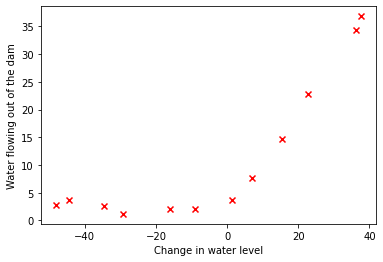

In [138]:
plt.scatter(X,y,marker="x",color="red")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")

In [139]:
X.shape , y.shape
X = np.c_[np.ones((X.shape[0],1)),X]

In [140]:
Xval = np.c_[np.ones((Xval.shape[0],1)),Xval]

In [141]:
def Normalize_Feature(X):
    X_norm = X.copy()
    mean = np.mean(X[:,1:],axis=0)
    sigma = np.std(X[:,1:],axis=0)
    X_norm[:,1:] = (X[:,1:]-mean)/sigma
    
    return X_norm,mean,sigma

In [142]:
X_norm,mean,sigma = Normalize_Feature(X)
#print(X_norm)
print(mean)
print(sigma)

[-5.08542635]
[28.68873076]


In [143]:
def compute_cost(Theta,X,y,lambd):
    m = X.shape[0]
    Theta = Theta.reshape(Theta.shape[0],1)
    H = np.dot(Theta.T,X.T)
    #print(Theta.shape)
    J =  np.sum((H.T - y)**2)/(2*m) + np.sum(Theta[1:,:]**2)*(lambd/(2*m))
    return J
    
    
    

In [144]:
def compute_grads(Theta,X,y,lambd):
    
    m = X.shape[0]
    Theta = Theta.reshape(Theta.shape[0],1)
    #print(Theta.shape)
    grads = np.zeros((Theta.shape))
    J = compute_cost(Theta,X,y,lambd)
    H = np.dot(Theta.T,X.T)
    grads =  np.dot((H.T - y).T,X).T/m
    #print(grads.shape)
    grads[1:,:] = grads[1:,:]+ (Theta[1:,:]*(lambd/m))
    return grads

In [145]:
import scipy.optimize as opt

In [146]:
theta = np.ones((X.shape[1],1))
#
J = compute_cost(theta,X,y,lambd=1)
J

303.9931922202643

In [147]:
grads = compute_grads(theta,X,y,1)

In [148]:
grads

array([[-15.30301567],
       [598.25074417]])

In [149]:
initial_theta = np.zeros((X.shape[1],1))
learningrate = 0
print(initial_theta.shape)
result = opt.fmin_tnc(func=compute_cost,x0=initial_theta,fprime=compute_grads ,args=(X,y,learningrate))

(2, 1)


In [150]:
Theta = result[0].reshape(initial_theta.shape)

In [151]:
Theta.shape

(2, 1)

In [152]:
y_pred = np.dot(Theta.T,X.T)

Text(0, 0.5, 'Water flowing out of the dam')

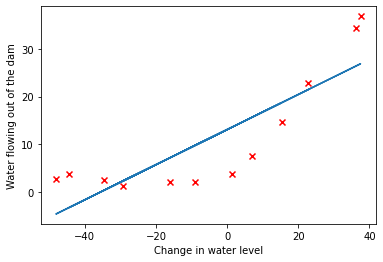

In [153]:
plt.scatter(X[:,1],y,marker="x",color="red")
plt.plot(X[:,1],y_pred.T)
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")

In [154]:
def train_LinearReg(X,y,lambd):
    initial_theta = np.zeros((X.shape[1],1))
    learningrate = lambd
    #print(initial_theta.shape)
    result = opt.fmin_tnc(func=compute_cost,x0=initial_theta,fprime=compute_grads ,args=(X,y,learningrate))
    return result[0].reshape(initial_theta.shape)

In [155]:
def learningCurve(X,y,Xval,yval,lambd):
    m = X.shape[0]
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    
    for i in range(0,m):
        Theta = train_LinearReg(X[0:i+1,:],y[0:i+1,:],lambd)
        error_train[i,0] = compute_cost(Theta,X[0:i+1,:],y[0:i+1,:],0)
        error_val[i,0] = compute_cost(Theta,Xval,yval,0)
    
    return error_train,error_val

In [156]:
###Learning curve for Linear Regression#####
lambd = 0
error_train,error_val = learningCurve(X,y,Xval,yval,lambd)

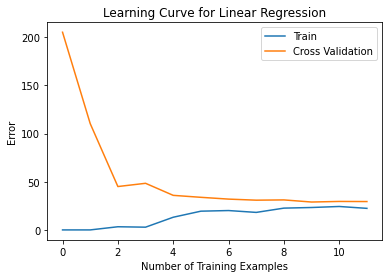

In [157]:
plt.plot(error_train,label="Train")
plt.plot(error_val,label="Cross Validation")
plt.xlabel("Number of Training Examples")
plt.ylabel("Error")
plt.title("Learning Curve for Linear Regression")
plt.legend(loc="upper right")

In [158]:
####Poly Features######
feature_mapper = PolynomialFeatures(degree=8)
X_fm = feature_mapper.fit_transform(X[:,1:])

In [159]:
Xval_fm = feature_mapper.fit_transform(Xval[:,1:])

In [160]:
Xtest_fm = feature_mapper.fit_transform(Xtest)

In [161]:
X_fm_norm,mu,sigma = Normalize_Feature(X_fm)

In [162]:
Xval_fm_norm = Xval_fm.copy()
Xtest_fm_norm = Xtest_fm.copy()
Xval_fm_norm[:,1:] = (Xval_fm[:,1:]-mu)/sigma
Xtest_fm_norm[:,1:] = (Xtest_fm[:,1:]-mu)/sigma

In [163]:
lambd=0
Theta = train_LinearReg(X_fm_norm,y,lambd)

Text(0, 0.5, 'Water flowing out of the dam')

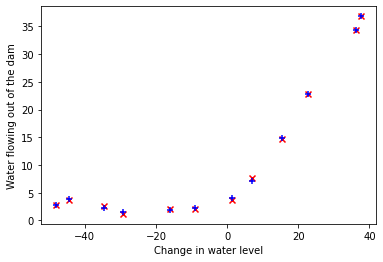

In [164]:
#plt.scatter(X_fm_norm[:,1],y)
plt.scatter(X[:,1],y,marker="x",color="red")
plt.scatter(X[:,1],X_fm_norm@Theta,color="blue",marker="+")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")

In [165]:
def plot_learningCurve(error_train,error_val,lambd):
    plt.plot(error_train,label="Train")
    plt.plot(error_val,label="Cross Validation")
    plt.xlabel("Number of Training Examples")
    plt.ylabel("Error")
    plt.title("Polynomial Regression Curve lambda="+str(lambd))
    plt.legend(loc="upper right")

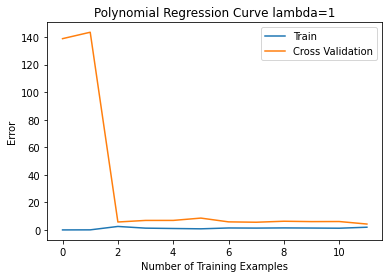

In [166]:
lambd = 1
error_train,error_val = learningCurve(X_fm_norm,y,Xval_fm_norm,yval,lambd)
plot_learningCurve(error_train,error_val,lambd)

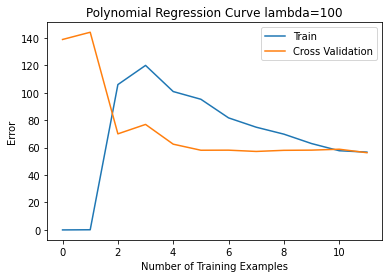

In [167]:
lambd = 100
error_train,error_val = learningCurve(X_fm_norm,y,Xval_fm_norm,yval,lambd)
plot_learningCurve(error_train,error_val,lambd)

In [168]:
def validation_curve(lambd_vec,X,y,Xval,yval):
    error_train = np.zeros((len(lambd_vec),1))
    error_val = np.zeros((len(lambd_vec),1))
    for i in range(len(lambd_vec)):
        lambd = lambd_vec[i]
        Theta = train_LinearReg(X,y,lambd)
        error_train[i] = compute_cost(Theta,X,y,0)
        error_val[i] = compute_cost(Theta,Xval,yval,0)
    
    return error_train,error_val
        

In [169]:
#Selecting the proper learning rate####
lambd_vec = [0 ,0.001, 0.003, 0.01, 0.03 ,0.1 ,0.3, 1, 3, 10]
error_train,error_val = validation_curve(lambd_vec,X_fm_norm,y,Xval_fm_norm,yval)

Text(0, 0.5, 'Error')

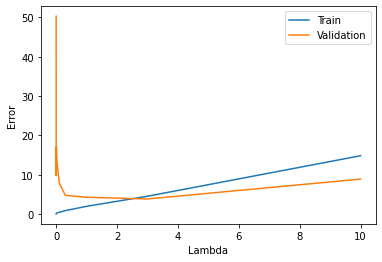

In [170]:
plt.plot(lambd_vec,error_train,label="Train")
plt.plot(lambd_vec,error_val,label="Validation")
plt.legend(loc="upper right")
plt.xlabel("Lambda")
plt.ylabel("Error")

In [171]:
Theta = train_LinearReg(X_fm_norm,y,lambd=3)
testError = compute_cost(Theta,Xtest_fm_norm,ytest,lambd=0)

In [172]:
testError

3.5720422600742303